# Stock Value-At-Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'DB' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def var(stock_returns, market_returns):
    m = np.matrix([stock_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    alpha = np.mean(stock_returns) - beta * np.mean(market_returns)
    sorted_returns = np.sort(stock_returns)
    index = int(alpha * len(sorted_returns))
    VaR = abs(stock_returns[index])
    return VaR

Text(0, 0.5, 'Value-at-Risk')

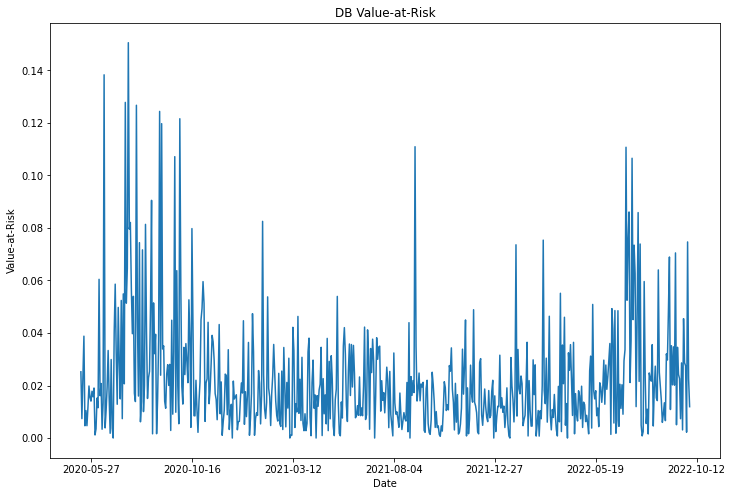

In [6]:
# Compute the running Value-at-Risk
running = [var(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Value-at-Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Value-at-Risk')
plt.xlabel('Date')
plt.ylabel('Value-at-Risk')

In [7]:
stock_var = var(stocks_returns, market_returns)
stock_var

0.025210035389953145

In [8]:
running = [var(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.025210035389953145,
 0.007389105090341075,
 0.02357312706781678,
 0.03878785316911726,
 0.004667484231341668,
 0.010452965220366317,
 0.004694875402239451,
 0.011792495636557154,
 0.019813488717394634,
 0.015457715902487346,
 0.014051527590900115,
 0.017814618019530548,
 0.015719393750359245,
 0.019047664329896907,
 0.0011681487874468655,
 0.0035005847569010706,
 0.015222526245380896,
 0.011534066714380176,
 0.06043327620044314,
 0.016129142070543723,
 0.020764965190867568,
 0.0033482154990946977,
 0.013348169448546665,
 0.1383095992426875,
 0.0038572192006514072,
 0.010566735491465695,
 0.01941745093668379,
 0.0333334075520928,
 0.01566817752706995,
 0.0018148531556532177,
 0.029891314897736665,
 0.003734767986793397,
 0.0,
 0.04029994897504108,
 0.058593675308853066,
 0.03215771869726458,
 0.012861635955574213,
 0.049735435882153345,
 0.0289530962790846,
 0.014908298003755482,
 0.05238651176741749,
 0.007371009723261102,
 0.054878066165160555,
 0.02064514726135569,
 0.127799756110